# Jonathan Halverson
# Thursday, November 9, 2017
# MLP applied to a small data set

The purpose of this notebook is to show that a DNN is not a good model for a small data set.

In [1]:
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [3]:
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


In [5]:
df.describe().applymap(lambda x: round(x, 1))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,13.0,2.3,2.4,19.5,99.7,2.3,2.0,0.4,1.6,5.1,1.0,2.6,746.9,0.9
std,0.8,1.1,0.3,3.3,14.3,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9,0.8
min,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0,0.0
25%,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.3,3.2,0.8,1.9,500.5,0.0
50%,13.1,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,673.5,1.0
75%,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,1.9,6.2,1.1,3.2,985.0,2.0
max,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0,2.0


In [6]:
df.kurt()

alcohol                        -0.852500
malic_acid                      0.299207
ash                             1.143978
alcalinity_of_ash               0.487942
magnesium                       2.104991
total_phenols                  -0.835627
flavanoids                     -0.880382
nonflavanoid_phenols           -0.637191
proanthocyanins                 0.554649
color_intensity                 0.381522
hue                            -0.344096
od280/od315_of_diluted_wines   -1.086435
proline                        -0.248403
target                         -1.322787
dtype: float64

In [7]:
df.skew()

alcohol                        -0.051482
malic_acid                      1.039651
ash                            -0.176699
alcalinity_of_ash               0.213047
magnesium                       1.098191
total_phenols                   0.086639
flavanoids                      0.025344
nonflavanoid_phenols            0.450151
proanthocyanins                 0.517137
color_intensity                 0.868585
hue                             0.021091
od280/od315_of_diluted_wines   -0.307285
proline                         0.767822
target                          0.107431
dtype: float64

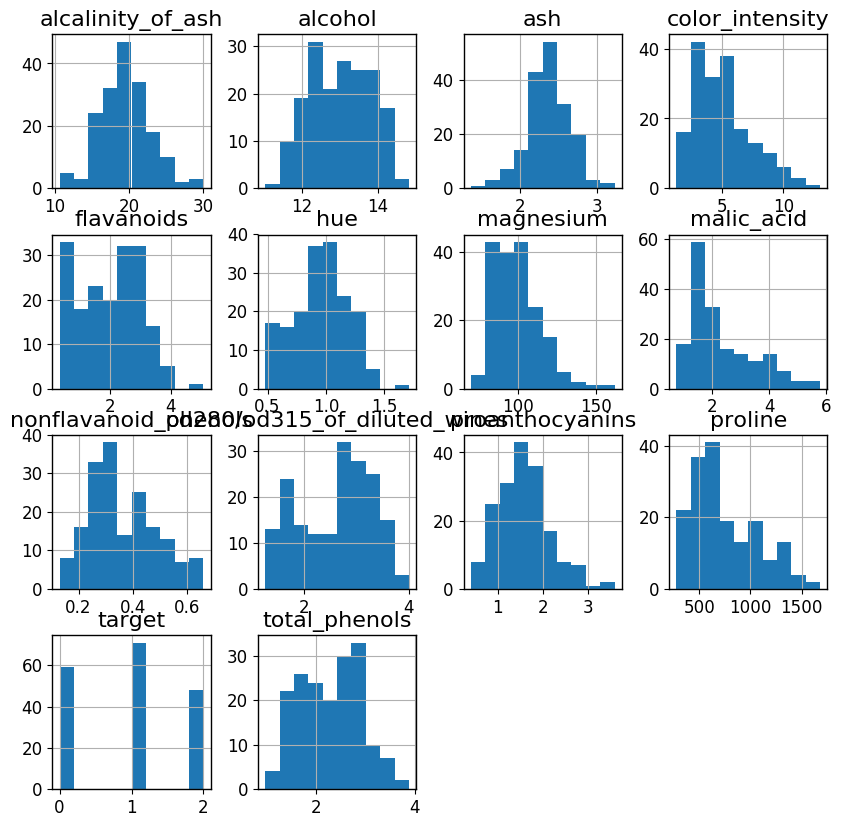

In [8]:
_ = df.hist(figsize=(10, 10))

In [9]:
cm = df.corr().applymap(lambda x: round(x, 1))
cm

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.0,0.1,0.2,-0.3,0.3,0.3,0.2,-0.2,0.1,0.5,-0.1,0.1,0.6,-0.3
malic_acid,0.1,1.0,0.2,0.3,-0.1,-0.3,-0.4,0.3,-0.2,0.2,-0.6,-0.4,-0.2,0.4
ash,0.2,0.2,1.0,0.4,0.3,0.1,0.1,0.2,0.0,0.3,-0.1,0.0,0.2,-0.0
alcalinity_of_ash,-0.3,0.3,0.4,1.0,-0.1,-0.3,-0.4,0.4,-0.2,0.0,-0.3,-0.3,-0.4,0.5
magnesium,0.3,-0.1,0.3,-0.1,1.0,0.2,0.2,-0.3,0.2,0.2,0.1,0.1,0.4,-0.2
total_phenols,0.3,-0.3,0.1,-0.3,0.2,1.0,0.9,-0.4,0.6,-0.1,0.4,0.7,0.5,-0.7
flavanoids,0.2,-0.4,0.1,-0.4,0.2,0.9,1.0,-0.5,0.7,-0.2,0.5,0.8,0.5,-0.8
nonflavanoid_phenols,-0.2,0.3,0.2,0.4,-0.3,-0.4,-0.5,1.0,-0.4,0.1,-0.3,-0.5,-0.3,0.5
proanthocyanins,0.1,-0.2,0.0,-0.2,0.2,0.6,0.7,-0.4,1.0,-0.0,0.3,0.5,0.3,-0.5
color_intensity,0.5,0.2,0.3,0.0,0.2,-0.1,-0.2,0.1,-0.0,1.0,-0.5,-0.4,0.3,0.3


Cleaning is not necessary. Would be nice to add features but we will ignore this here.

### Dimensionality reduction and visualization

In [10]:
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
X_std = std_sc.fit_transform(X)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [12]:
def plot_reduced(Z):
     plt.scatter(Z[y==0][:,0], Z[y==0][:,1])
     plt.scatter(Z[y==1][:,0], Z[y==1][:,1])
     plt.scatter(Z[y==2][:,0], Z[y==2][:,1])

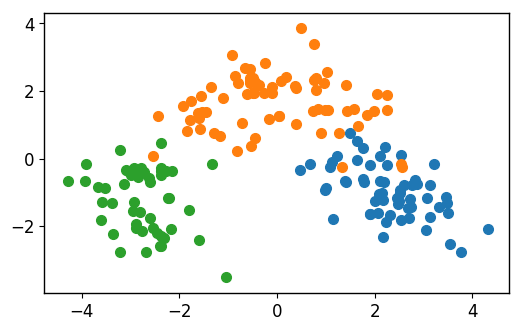

In [13]:
plot_reduced(X_pca)

PCA seems to help quite a bit to view the data in two dimensions.

In [14]:
from sklearn.manifold import TSNE

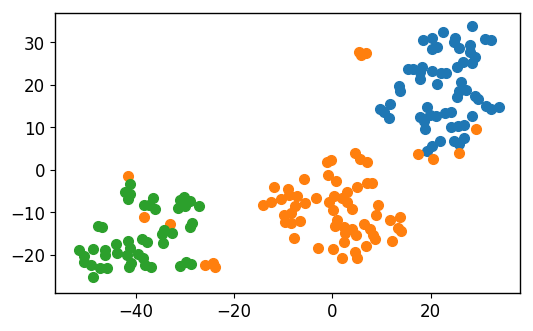

In [15]:
tsne = TSNE(n_components=2, perplexity=10.0)
X_tsne = tsne.fit_transform(X_std)
plot_reduced(X_tsne)

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [17]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_std, y)

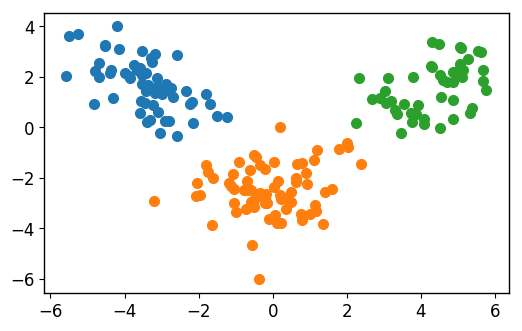

In [18]:
plot_reduced(X_lda)

LDA appears to have worked very well. The three classes new appear to be linearly separable. For fun lets fit a linear perceptron to the LDA transformed data:

In [19]:
lda.coef_

array([[ 2.31158598, -0.05456263,  1.43121258, -2.58894922,  0.0943084 ,
        -1.3541328 ,  4.83393251,  0.29293067, -0.55843362, -1.81887379,
         0.0537362 ,  2.86618349,  4.40790447],
       [-1.71905029, -0.8558601 , -1.57880044,  1.16425328,  0.0187532 ,
         0.01895753,  1.34365242,  0.5152821 ,  0.42728037, -1.51295649,
         0.86906015, -0.02426469, -2.1478733 ],
       [-0.29856255,  1.33302631,  0.57611019,  1.46012544, -0.14365985,
         1.63641355, -7.92919459, -1.12224872,  0.05438911,  4.47361384,
        -1.35153556, -3.48712568, -2.24098665]])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)
X_train_std = std_sc.fit_transform(X_train)
X_test_std = std_sc.transform(X_test)

Let's check the stratification:

In [21]:
np.bincount(y)

array([59, 71, 48])

In [22]:
np.bincount(y_train)

array([47, 57, 38])

In [23]:
np.bincount(y_test)

array([12, 14, 10])

In [24]:
59.0 / y.size, 47.0 / y_train.size, 12.0 / y_test.size

(0.33146067415730335, 0.33098591549295775, 0.3333333333333333)

### Machine learning models

#### Perceptron

In [25]:
from sklearn.linear_model import Perceptron

In [26]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train_std, y_train)

In [27]:
per_clf = Perceptron(max_iter=1000)
per_clf.fit(X_lda, y_train)
per_clf.score(X_lda, y_train)

0.99295774647887325

In [28]:
per_clf.fit(lda.transform(X_test_std), y_test)
per_clf.score(lda.transform(X_test_std), y_test)

1.0

So we get a perfect score with the worse model on the test set when LDA is applied as a supervised dimensionality reduction technique. Let's try it without LDA:

In [29]:
per_clf.fit(X_train_std, y_train)
per_clf.score(X_train_std, y_train)

1.0

In [30]:
per_clf.fit(X_test_std, y_test)
per_clf.score(X_test_std, y_test)

1.0

#### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tr_clf = DecisionTreeClassifier()
tr_clf.fit(X_train_std, y_train)
tr_clf.score(X_train_std, y_train)

1.0

In [33]:
tr_clf.fit(X_test_std, y_test)
tr_clf.score(X_test_std, y_test)

1.0

#### MLP

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu',
                        max_iter=10000, solver='sgd', nesterovs_momentum=True, momentum=0.9)
mlp_clf.fit(X_train_std, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [36]:
mlp_clf.score(X_train_std, y_train)

0.99295774647887325

In [37]:
mlp_clf.fit(X_test_std, y_test)
mlp_clf.score(X_test_std, y_test)

1.0

The idea of this notebook was to show that when not much data available a DNN is not a good choice. However, the data are linearly separable so every model works well.